# Creating "combined_data.csv" (concatenation of all sessions' csv's to 1 big dataset)

When running this, you should click on "upload files" button that comes up and choose all the session' csv's files from your local pc (first download them from the teacher's folder in the shared drive).

In [ ]:
# Import necessary libraries
from google.colab import files
import pandas as pd

# Step 1: Upload CSV files
uploaded = files.upload()

# Step 2: Define the function to process the uploaded CSV files
def concatenate_csvs(filenames, output_file="combined_data.csv"):
    """
    This function takes a list of filenames, loads each CSV file, concatenates them into a single
    DataFrame, and saves the concatenated data to a CSV file.

    :param filenames: List of CSV filenames (strings).
    :param output_file: The name of the output CSV file to save the concatenated data.
    :return: The combined DataFrame.
    """
    # List to store individual DataFrames
    dfs = []

    # Loop through each file in the list of filenames and load them
    for filename in filenames:
        print(f"Loading file: {filename}")
        df = pd.read_csv(filename)
        dfs.append(df)  # Append the DataFrame to the list

    # Concatenate all the DataFrames into one large DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    print("Combined DataFrame shape:", combined_df.shape)
    print(combined_df.head())  # Display the first few rows of the combined DataFrame

    # Save the combined DataFrame to a CSV file
    combined_df.to_csv(output_file, index=False)
    print(f"Combined DataFrame saved to {output_file}")

    return combined_df

# Step 3: Example usage with the uploaded CSV filenames
filenames = list(uploaded.keys())  # Get the filenames from the uploaded files
combined_df = concatenate_csvs(filenames, output_file="combined_data.csv")


Saving 24_127.csv to 24_127.csv
Saving 24_128.csv to 24_128.csv
Saving 24_129.csv to 24_129.csv
Saving 24_130.csv to 24_130.csv
Saving 24_131.csv to 24_131.csv
Saving 24_132.csv to 24_132.csv
Saving 24_133.csv to 24_133.csv
Saving 24_134.csv to 24_134.csv
Saving 24_135.csv to 24_135.csv
Saving 24_136.csv to 24_136.csv
Saving 24_137.csv to 24_137.csv
Saving 24_138.csv to 24_138.csv
Saving 24_139.csv to 24_139.csv
Loading file: 24_127.csv
Loading file: 24_128.csv
Loading file: 24_129.csv
Loading file: 24_130.csv
Loading file: 24_131.csv
Loading file: 24_132.csv
Loading file: 24_133.csv
Loading file: 24_134.csv
Loading file: 24_135.csv
Loading file: 24_136.csv
Loading file: 24_137.csv
Loading file: 24_138.csv
Loading file: 24_139.csv
Combined DataFrame shape: (14418, 8)
   knesset  session   speaker party         role  \
0      NaN      NaN       NaN   NaN          NaN   
1      NaN      NaN  מיקי לוי   NaN        היו"ר   
2      NaN      NaN  דן מרזוק   NaN  מזכיר הכנסת   
3      NaN    

# Creating a new "combined_data.csv" because i realized there should be a number of the session related to its csv' rows. (this file is better) - also notice the dataframe is called "combined_df".

In [35]:
# Import necessary libraries
from google.colab import files
import pandas as pd

# Step 1: Upload CSV files
uploaded = files.upload()

# Step 2: Define the function to process the uploaded CSV files
def concatenate_csvs_with_session(filenames, output_file="combined_data.csv"):
    """
    This function takes a list of filenames, loads each CSV file, concatenates them into a single
    DataFrame, adds a 'session' column with the name of the file for each row, and saves the combined
    data to a CSV file.

    :param filenames: List of CSV filenames (strings).
    :param output_file: The name of the output CSV file to save the concatenated data.
    :return: The combined DataFrame.
    """
    # List to store individual DataFrames
    dfs = []

    # Loop through each file in the list of filenames and load them
    for filename in filenames:
        print(f"Loading file: {filename}")
        df = pd.read_csv(filename)
        # Add a 'session' column with the filename (without the extension)
        df['session'] = filename.split('.')[0]
        dfs.append(df)  # Append the DataFrame to the list

    # Concatenate all the DataFrames into one large DataFrame
    combined_df = pd.concat(dfs, ignore_index=True)
    print("Combined DataFrame shape:", combined_df.shape)
    print(combined_df.head())  # Display the first few rows of the combined DataFrame

    # Save the combined DataFrame to a CSV file
    combined_df.to_csv(output_file, index=False)
    print(f"Combined DataFrame saved to {output_file}")

    return combined_df

# Step 3: Example usage with the uploaded CSV filenames
filenames = list(uploaded.keys())  # Get the filenames from the uploaded files
combined_df = concatenate_csvs_with_session(filenames, output_file="combined_data.csv")


Saving 24_127.csv to 24_127.csv
Saving 24_128.csv to 24_128.csv
Saving 24_129.csv to 24_129.csv
Saving 24_130.csv to 24_130.csv
Saving 24_131.csv to 24_131.csv
Saving 24_132.csv to 24_132.csv
Saving 24_133.csv to 24_133.csv
Saving 24_134.csv to 24_134.csv
Saving 24_135.csv to 24_135.csv
Saving 24_136.csv to 24_136.csv
Saving 24_137.csv to 24_137.csv
Saving 24_138.csv to 24_138.csv
Saving 24_139.csv to 24_139.csv
Loading file: 24_127.csv
Loading file: 24_128.csv
Loading file: 24_129.csv
Loading file: 24_130.csv
Loading file: 24_131.csv
Loading file: 24_132.csv
Loading file: 24_133.csv
Loading file: 24_134.csv
Loading file: 24_135.csv
Loading file: 24_136.csv
Loading file: 24_137.csv
Loading file: 24_138.csv
Loading file: 24_139.csv
Combined DataFrame shape: (14418, 8)
   knesset session   speaker party         role  \
0      NaN  24_127       NaN   NaN          NaN   
1      NaN  24_127  מיקי לוי   NaN        היו"ר   
2      NaN  24_127  דן מרזוק   NaN  מזכיר הכנסת   
3      NaN  24_127

## Removing "24_" from the session column from combined_df (from the "combined_data.csv that includes session' numbers). session = מליאה

In [37]:
# Remove "24_" prefix from the session column
combined_df['session'] = combined_df['session'].str.replace('24_', '', regex=False)

# Verify the changes
print(combined_df[['session']].head())

print(combined_df.head())


  session
0     127
1     127
2     127
3     127
4     127
   knesset session   speaker party         role  \
0      NaN     127       NaN   NaN          NaN   
1      NaN     127  מיקי לוי   NaN        היו"ר   
2      NaN     127  דן מרזוק   NaN  מזכיר הכנסת   
3      NaN     127  מיקי לוי   NaN        היו"ר   
4      NaN     127  מיקי לוי   NaN        היו"ר   

                                                text  \
0                      דברי הכנסתחוברת כ"וישיבה קכ"ז   
1  חברי הכנסת, היום ט' באייר התשפ"ב, 10 במאי 2022...   
2  ברשות יושב-ראש הכנסת, אני מתכבד להודיעכם, כי ה...   
3                                          תודה רבה.   
4  חברי הכנסת שמעוניינים לנאום נאומים בני דקה, בב...   

                        subject sub_subject  
0  מסמכים שהונחו על שולחן הכנסת         NaN  
1  מסמכים שהונחו על שולחן הכנסת         NaN  
2  מסמכים שהונחו על שולחן הכנסת         NaN  
3                נאומים בני דקה         NaN  
4                נאומים בני דקה         NaN  


In [42]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   knesset      0 non-null      float64
 1   session      14418 non-null  object 
 2   speaker      14407 non-null  object 
 3   party        7428 non-null   object 
 4   role         9841 non-null   object 
 5   text         14414 non-null  object 
 6   subject      14418 non-null  object 
 7   sub_subject  9230 non-null   object 
dtypes: float64(1), object(7)
memory usage: 901.2+ KB
None


You can see everything in the dataset is a string (object) and only one column is float64 (but this column is the same for all sessions because it is knesset 24).

Also there are important missing objects in column: speaker, party, text
And another missing objects in other columns : role, sub_subject, knesset

No missing objects in columns: session, subject (subject might have strong relation with the text being said under a specific subject)

In order to address the features or new features, they are all need to be numeric for the pair plot, so we can pick the relevant features (for linear regression, the first model, we should see a linear connection for example).

The target (label) y in this regression problem is "Num_of_text_rows" spoken by **any** of the הליכוד speakers, so we need a column that counts how many rows each unique speaker spoke at a **specific** session. (again a numeric column)

the features X could be whatever we choose.
possible features:

1. לכל חבר כנסת יש דירוג מספרי במפלגה שלו אז חשבתי לשים בכל מפלגה את דירוג החבר ואולי הדירוג משפיע על כמה שאותו חבר כנסת מדבר.
2. גודל המפלגה הוא כגודל המנדטים או כמות החברי כנסת במפלגה ובכל מקרה גם זה נומרי וגם זה יישתל בעמודה ניפרדת בהתאם למפלגה. ייתכן וזה משפיע מאוד על כמות הדיבור במליאה, כי גודל הזמן שניתן לדיבור במליאה הינו בקשר ישיר לגודל המפלגה, עפ"י מה שכתוב באתר הכנסת.
3. count לספור את מספר התווים בכל טקסט וכך בכל שורה יהיה נתון מספרי כמה החבר כנסת פותח את הפה. זה ייקח בחשבון כל תו כי יש טקסט שלפעמים אין בו כלום חוץ מסתם קיווקוו או רווח ויובל אמר שגם את זה אנו צריכים לספור.
4. count vectorizer (bag of words) - למעשה זה כמו פיצ'ר 3 אבל כאן יש דגש על המילים שהכי נאמרות בקובץ טקסט וכמה מכל מילה כזו יש, צריך לקחת בחשבון שלמעשה זה יוצר המון עמודות וצריך להגביל את זה אחרת יש בעיה של n>>p.

Imputing party in corrsepondance with speaker -
We need to impute the right party to the right speaker and that is something i did, and still working on. this is super important because if there is even one additional note then the code will not manage to capture and impute the party for that speaker with the same name + diffrenet number of notes.

## Creating a dictionary of הליכוד roles per speaker חבר כנסת and imputing them to the role column. details were taken from אתר הכנסת

In [38]:
# Cleaned dictionary with correct syntax and no empty strings
dict_knesset_24 = {
    'יולי יואל אדלשטיין': 'יו"ר ועדת חוץ וביטחון וחבר כנסת מטעם הליכוד',
    'אורלי לוי אבקסיס': 'חברת כנסת מטעם הליכוד',  # Provide a placeholder role if missing
    'יריב לוין': 'סגן ראש הממשלה שר המשפטים',
    'אופיר אקוניס': 'שר החדשנות המדע והטכנולוגיה',
    'בנימין נתניהו': 'ראש הממשלה',
    'אופיר כץ': 'חבר כנסת מטעם הליכוד',
    'דוד אמסלם': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
    'גלית דיסטל אטבריאן': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'שלמה קרעי': 'שר התקשורת',
    'פטין מולא': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
    'אמיר אוחנה': 'יושב–ראש הכנסת',
    'מאי גולן': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'מירי מרים רגב': 'שרת התחבורה והבטיחות בדרכים',
    'יואב קיש': 'שר החינוך, שיתוף פעולה אזורי והשר המקשר בין הממשלה לכנסת',
    'אלי כהן': 'שר האנרגיה והתשתיות',
    'יואב גלנט': 'שר הביטחון',  # Added a placeholder role
    'דסטה גדי יברקן': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
    'ישראל כץ': 'שר החוץ',
    'יובל שטייניץ': 'שר האוצר',  # Added a placeholder role
    'קטי קטרין שטרית': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'ניר ברקת': 'שר הכלכלה והתעשייה',
    'אבי דיכטר': 'שר החקלאות ופיתוח הכפר',
    'קרן ברק': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'דוד ביטן': 'יו"ר ועדת הכלכלה',
    'חיים כץ': 'שר התיירות',
    'גילה גמליאל': 'שרת המודיעין',
    'חוה אתי עטייה': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'מכלוף מיקי זוהר': 'שר התרבות והספורט',
    'צחי הנגבי': 'שר לעניינים אסטרטגיים'
}

# Use the dictionary to fill the 'role' column for speakers with missing roles
combined_df.loc[:, 'role'] = combined_df.apply(
    lambda row: dict_knesset_24.get(row['speaker'], row['role']), axis=1
)

# Verify the change
print(combined_df.head())
print(f"Number of missing roles: {combined_df['role'].isna().sum()}")


   knesset session   speaker party         role  \
0      NaN     127       NaN   NaN          NaN   
1      NaN     127  מיקי לוי   NaN        היו"ר   
2      NaN     127  דן מרזוק   NaN  מזכיר הכנסת   
3      NaN     127  מיקי לוי   NaN        היו"ר   
4      NaN     127  מיקי לוי   NaN        היו"ר   

                                                text  \
0                      דברי הכנסתחוברת כ"וישיבה קכ"ז   
1  חברי הכנסת, היום ט' באייר התשפ"ב, 10 במאי 2022...   
2  ברשות יושב-ראש הכנסת, אני מתכבד להודיעכם, כי ה...   
3                                          תודה רבה.   
4  חברי הכנסת שמעוניינים לנאום נאומים בני דקה, בב...   

                        subject sub_subject  
0  מסמכים שהונחו על שולחן הכנסת         NaN  
1  מסמכים שהונחו על שולחן הכנסת         NaN  
2  מסמכים שהונחו על שולחן הכנסת         NaN  
3                נאומים בני דקה         NaN  
4                נאומים בני דקה         NaN  
Number of missing roles: 4577


In [41]:
# Display the speaker and role columns
speaker_role_result = combined_df[['speaker', 'role']]

# Show the first few rows to verify
print(speaker_role_result.head())

# Optionally, display all unique speaker-role pairs
print(speaker_role_result.drop_duplicates())

print(combined_df.info())


    speaker         role
0       NaN          NaN
1  מיקי לוי        היו"ר
2  דן מרזוק  מזכיר הכנסת
3  מיקי לוי        היו"ר
4  מיקי לוי        היו"ר
           speaker                   role
0              NaN                    NaN
1         מיקי לוי                  היו"ר
2         דן מרזוק            מזכיר הכנסת
5      אוריאל בוסו                    NaN
7          מוסי רז                    NaN
...            ...                    ...
12645    יעקב טסלר                    NaN
12896   פנינה תמנו     שרת העלייה והקליטה
13029    צחי הנגבי  שר לעניינים אסטרטגיים
14079     יעקב אשר                  היו"ר
14331  עידית סילמן      יו"ר ועדת הבריאות

[173 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   knesset      0 non-null      float64
 1   session      14418 non-null  object 
 2   speaker      14407 non-null  object 
 3  

In [43]:
# Filter rows where 'role' is missing but 'speaker' is not null
missing_roles = combined_df[combined_df['role'].isna() & combined_df['speaker'].notna()]

# Display the rows with missing 'role'
print("Rows with missing 'role' for a valid 'speaker':")
print(missing_roles)


Rows with missing 'role' for a valid 'speaker':
       knesset session          speaker           party role  \
5          NaN     127      אוריאל בוסו             ש"ס  NaN   
7          NaN     127          מוסי רז             מרצ  NaN   
9          NaN     127  בועז טופורובסקי         יש עתיד  NaN   
11         NaN     127         אבי מעוז   הציונות הדתית  NaN   
13         NaN     127        עופר כסיף  הרשימה המשותפת  NaN   
...        ...     ...              ...             ...  ...   
14407      NaN     139        אחמד טיבי  הרשימה המשותפת  NaN   
14410      NaN     139     יצחק פינדרוס     יהדות התורה  NaN   
14412      NaN     139        אחמד טיבי  הרשימה המשותפת  NaN   
14414      NaN     139        אחמד טיבי  הרשימה המשותפת  NaN   
14416      NaN     139        אחמד טיבי  הרשימה המשותפת  NaN   

                                                    text  \
5      אדוני היושב-ראש, ברשותך, אני רוצה להתייחס היום...   
7      אני רוצה להצטרף לדברים של חבר הכנסת בוסו, אבל ...   
9  

In [44]:
# Find unique speakers where 'role' is missing
speakers_with_missing_roles = combined_df[combined_df['role'].isna() & combined_df['speaker'].notna()]['speaker'].unique()

# Display the unique speakers
print("Speakers with missing roles:")
print(speakers_with_missing_roles)


Speakers with missing roles:
['אוריאל בוסו' 'מוסי רז' 'בועז טופורובסקי' 'אבי מעוז' 'עופר כסיף'
 'משה אבוטבול' 'גבי לסקי' 'מופיד מרעי' 'אחמד טיבי' 'ישראל אייכלר'
 'טטיאנה מזרסקי' 'יבגני סובה' 'צבי האוזר' 'ניר אורבך' 'גלעד קריב'
 'נעמה לזימי' 'אורי מקלב' 'יוסף טייב' 'אוסאמה סעדי' 'יעל רון בן משה'
 'משה טור פז' 'ענבר בזק' 'לימור מגן תלם' 'עלי סלאלחה' 'יעקב מרגי' 'רון כץ'
 'שמחה רוטמן' 'יעקב אשר' 'קריאה' 'קריאות' 'מירב בן ארי' 'איתן גינזבורג'
 'משה ארבל' "בצלאל סמוטריץ'" 'איתמר בן גביר' 'עאידה תומא סלימאן'
 'איימן עודה' 'ולדימיר בליאק' 'אורית מלכה סטרוק' 'שירלי פינטו קדוש'
 'יסמין פרידמן' 'נירה שפק' 'ינון אזולאי' 'משה גפני' 'חיים ביטון'
 'מיכאל מלכיאלי' 'מיכל רוזין' 'סמי אבו שחאדה' 'אלי אבידר'
 "אלינה ברדץ' יאלוב" 'יוסף שיין' 'יצחק פינדרוס' "ג'ידא רינאוי זועבי"
 'מאיר פרוש' 'יואב בן צור' 'עמיחי שיקלי' 'מיכל וולדיגר' 'רות וסרמן לנדה'
 'מתן כהנא' 'יאיר גולן' 'מיכל שיר סגמן' 'אלכס קושניר' 'מנסור עבאס'
 'עידית סילמן' 'אמילי חיה מואטי' 'אופיר סופר' 'מיקי לוי' 'יוראי להב הרצנו'
 "אימאן ח'טיב יאס

In [46]:
unique_parties = combined_df['party'].unique()

# Print unique parties
print("Unique Parties:")
for party in unique_parties:
    print(party)

Unique Parties:
nan
ש"ס
מרצ
יש עתיד
הציונות הדתית
הרשימה המשותפת
הליכוד
כחול לבן
יהדות התורה
ישראל ביתנו
תקווה חדשה
ימינה
העבודה
רע"מ – רשימת האיחוד הערבי
בשם ועדת העבודה והרווחה
בשם ועדת הכנסת
פריג'
בשם ועדת הכלכלה
בשם ועדת ביטחון הפנים


Here are the unique parties in the dataset. one is called nan (probably a mistake or something we need to cleanup).
At the end, there are a list of parties which i am not sure what they are exactly, so we need to check that later using knesset website.

In [47]:
# Step 1: Find the speakers that belong to 'הליכוד'
likud_speakers = combined_df[combined_df['party'] == 'הליכוד']['speaker'].unique()

# Step 2: Update the 'party' column for rows where the 'speaker' is in the list of 'הליכוד' speakers
# and where the 'party' column is missing or incorrect
combined_df.loc[combined_df['speaker'].isin(likud_speakers) & combined_df['party'].isna(), 'party'] = 'הליכוד'

# Step 3: Check if there are any mistakes (incorrect party values for 'הליכוד' speakers)
combined_df.loc[combined_df['speaker'].isin(likud_speakers) & (combined_df['party'] != 'הליכוד'), 'party'] = 'הליכוד'

# Verify the change
print(combined_df.head())

   knesset session   speaker party         role  \
0      NaN     127       NaN   NaN          NaN   
1      NaN     127  מיקי לוי   NaN        היו"ר   
2      NaN     127  דן מרזוק   NaN  מזכיר הכנסת   
3      NaN     127  מיקי לוי   NaN        היו"ר   
4      NaN     127  מיקי לוי   NaN        היו"ר   

                                                text  \
0                      דברי הכנסתחוברת כ"וישיבה קכ"ז   
1  חברי הכנסת, היום ט' באייר התשפ"ב, 10 במאי 2022...   
2  ברשות יושב-ראש הכנסת, אני מתכבד להודיעכם, כי ה...   
3                                          תודה רבה.   
4  חברי הכנסת שמעוניינים לנאום נאומים בני דקה, בב...   

                        subject sub_subject  
0  מסמכים שהונחו על שולחן הכנסת         NaN  
1  מסמכים שהונחו על שולחן הכנסת         NaN  
2  מסמכים שהונחו על שולחן הכנסת         NaN  
3                נאומים בני דקה         NaN  
4                נאומים בני דקה         NaN  


In [49]:
# Count the number of rows with 'nan' in the 'party' column
nan_count = combined_df['party'].isna().sum()

# Print the result
print(f"Number of rows with 'nan' in the 'party' column: {nan_count}")


Number of rows with 'nan' in the 'party' column: 6717


That is a list of speakers that don't have a role in the role column:

In [50]:
# Filter the rows where 'role' is either nan or an empty string
filtered_speakers = combined_df[combined_df['role'].isna() | (combined_df['role'] == '')]

# Get the unique 'speaker' values from the filtered rows
unique_speakers_with_no_role = filtered_speakers['speaker'].unique()

# Print the unique speakers
print("Unique speakers with no role (nan or empty):")
for speaker in unique_speakers_with_no_role:
    print(speaker)


Unique speakers with no role (nan or empty):
nan
אוריאל בוסו
מוסי רז
בועז טופורובסקי
אבי מעוז
עופר כסיף
משה אבוטבול
גבי לסקי
מופיד מרעי
אחמד טיבי
ישראל אייכלר
טטיאנה מזרסקי
יבגני סובה
צבי האוזר
ניר אורבך
גלעד קריב
נעמה לזימי
אורי מקלב
יוסף טייב
אוסאמה סעדי
יעל רון בן משה
משה טור פז
ענבר בזק
לימור מגן תלם
עלי סלאלחה
יעקב מרגי
רון כץ
שמחה רוטמן
יעקב אשר
קריאה
קריאות
מירב בן ארי
איתן גינזבורג
משה ארבל
בצלאל סמוטריץ'
איתמר בן גביר
עאידה תומא סלימאן
איימן עודה
ולדימיר בליאק
אורית מלכה סטרוק
שירלי פינטו קדוש
יסמין פרידמן
נירה שפק
ינון אזולאי
משה גפני
חיים ביטון
מיכאל מלכיאלי
מיכל רוזין
סמי אבו שחאדה
אלי אבידר
אלינה ברדץ' יאלוב
יוסף שיין
יצחק פינדרוס
ג'ידא רינאוי זועבי
מאיר פרוש
יואב בן צור
עמיחי שיקלי
מיכל וולדיגר
רות וסרמן לנדה
מתן כהנא
יאיר גולן
מיכל שיר סגמן
אלכס קושניר
מנסור עבאס
עידית סילמן
אמילי חיה מואטי
אופיר סופר
מיקי לוי
יוראי להב הרצנו
אימאן ח'טיב יאסין
רם שפע
יעקב ליצמן
מיכאל מרדכי ביטון
אזורי עיסאווי
זאב בנימין בגין
מאיר יצחק הלוי
אבתיסאם מראענה
רם בן ברק
אביר קארה
שרן מרים השכל

In this list we see the speakers that have a party and which speaker is grouped in which party :

In [59]:
# Group by 'party' and list the speakers associated with each party
grouped_by_party = combined_df.groupby('party')['speaker'].apply(list).reset_index()

# Display the grouped information
print(grouped_by_party)


             party                                            speaker
0           הליכוד  [דוד ביטן, דוד ביטן, דוד ביטן, דוד ביטן, דוד ב...
1           העבודה  [גלעד קריב, גלעד קריב, גלעד קריב, גלעד קריב, ג...
2   הרשימה המשותפת  [אחמד טיבי, אחמד טיבי, אחמד טיבי, אחמד טיבי, א...
3      יהדות התורה  [ישראל אייכלר, ישראל אייכלר, ישראל אייכלר, ישר...
4            ימינה  [ניר אורבך, ניר אורבך, ניר אורבך, עידית סילמן,...
5          יש עתיד  [מיקי לוי, מיקי לוי, מיקי לוי, מיקי לוי, מיקי ...
6      ישראל ביתנו  [יבגני סובה, יבגני סובה, יבגני סובה, יבגני סוב...
7         כחול לבן  [יעל רון בן משה, יעל רון בן משה, יעל רון בן מש...
8              מרצ  [מוסי רז, מיכל רוזין, מיכל רוזין, מיכל רוזין, ...
9             רע"מ  [מנסור עבאס, מנסור עבאס, מנסור עבאס, מנסור עבא...
10             ש"ס  [יעקב מרגי, מיכאל מלכיאלי, מיכאל מלכיאלי, יעקב...
11      תקווה חדשה  [צבי האוזר, צבי האוזר, צבי האוזר, צבי האוזר, צ...


Again speakers grouped in parties but now the unique speakers, better visualization :

In [60]:
# Group by 'party' and list unique speakers associated with each party
grouped_by_party_unique = combined_df.groupby('party')['speaker'].apply(lambda x: list(set(x))).reset_index()

# Display the grouped information with unique speakers
print(grouped_by_party_unique)


             party                                     speaker
0           הליכוד        [בנימין נתניהו, דוד ביטן, יריב לוין]
1           העבודה         [רם שפע, אבתיסאם מראענה, גלעד קריב]
2   הרשימה המשותפת                                 [אחמד טיבי]
3      יהדות התורה                    [יעקב אשר, ישראל אייכלר]
4            ימינה                    [ניר אורבך, עידית סילמן]
5          יש עתיד      [מיקי לוי, בועז טופורובסקי, רם בן ברק]
6      ישראל ביתנו  [אלכס קושניר, יוליה מלינובסקי, יבגני סובה]
7         כחול לבן             [איתן גינזבורג, יעל רון בן משה]
8              מרצ                       [מוסי רז, מיכל רוזין]
9             רע"מ                                [מנסור עבאס]
10             ש"ס                  [מיכאל מלכיאלי, יעקב מרגי]
11      תקווה חדשה                                 [צבי האוזר]


## Creating a dictionary of speaker with their corresponding party to try and impute the parties, in order to reduce number of missing parties (again using knesset website)

In [57]:
import pandas as pd

# DataFrame with columns ['Speaker', 'Party']
# Create a dictionary manually for each speaker with their corresponding party
speaker_to_party = {
    'מיקי לוי': 'יש עתיד',
    'יעקב אשר': 'יהדות התורה',
    'דוד ביטן': 'הליכוד',
    'איתן גינזבורג': 'כחול לבן',
    'צבי האוזר': 'תקווה חדשה',
    'אחמד טיבי': 'הרשימה המשותפת',
    'אמילי מואטי': 'העבודה',
    'יעקב מרגי': 'ש"ס',
    'יבגני סובה': 'ישראל ביתנו',
    'מנסור עבאס': 'רע"מ',
    'זועבי': 'מרצ',
    'ניר אורבך': 'ימינה',
    'אלכס קושניר': 'ישראל ביתנו',
    'מיכאל ביטון': 'כחול לבן',
    'רם בן ברק': 'יש עתיד',
    'סעיד אלחרומי': 'רע"מ',
    'וליד טאהא': 'רע"מ',
    'גלעד קריב': 'העבודה',
    'שרן השכל': 'תקווה חדשה',
    'אפרת רייטן': 'העבודה',
    'עידית סילמן': 'ימינה',
    'מירב בן-ארי': 'יש עתיד',
    'יוליה מלינובסקי': 'ישראל ביתנו',
    'עאידה תומה סלימאן': 'הרשימה המשותפת',
    'מיכל שיר': 'תקווה חדשה',
    'יעל רון בן משה': 'כחול לבן',
    'מוסי רז': 'מרצ',
    'רם שפע': 'העבודה',
    'אבתיסאם מראענה': 'העבודה',
    'יריב לוין': 'הליכוד',
    'בועז טופורובסקי': 'יש עתיד',
    'מיכאל מלכיאלי': 'ש"ס',
    'ישראל אייכלר': 'יהדות התורה',
    'אורית סטרוק': 'הציונות הדתית',
    'סאמי אבו שחאדה': 'הרשימה המשותפת',
    'מיכל רוזין': 'מרצ',
    'בנימין נתניהו': 'הליכוד'
    # Add more speakers and their corresponding party information here
}

# Replace all 'Party' values using the 'Speaker' to 'Party' mapping
combined_df['party'] = combined_df['speaker'].map(speaker_to_party)


In [52]:
print(combined_df.columns)


Index(['knesset', 'session', 'speaker', 'party', 'role', 'text', 'subject',
       'sub_subject'],
      dtype='object')


In [58]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   knesset      0 non-null      float64
 1   session      14418 non-null  object 
 2   speaker      14407 non-null  object 
 3   party        5289 non-null   object 
 4   role         9841 non-null   object 
 5   text         14414 non-null  object 
 6   subject      14418 non-null  object 
 7   sub_subject  9230 non-null   object 
dtypes: float64(1), object(7)
memory usage: 901.2+ KB
None


In [55]:
# Count the number of missing values in the 'party' column
missing_party_count = combined_df['party'].isna().sum()

print(f"Number of missing values in 'party': {missing_party_count}")


Number of missing values in 'party': 9129


In [62]:
# Impute 'party' based on 'speaker'
combined_df['party'] = combined_df['party'].fillna(combined_df['speaker'].map(speaker_to_party))


In [68]:
missing_parties = combined_df[combined_df['party'].isna()]
print(missing_parties[['speaker', 'party']])


                  speaker party
0                     NaN   NaN
2                דן מרזוק   NaN
5             אוריאל בוסו   NaN
11               אבי מעוז   NaN
13              עופר כסיף   NaN
...                   ...   ...
14395               קריאה   NaN
14403  ג'ידא רינאוי זועבי   NaN
14405  ג'ידא רינאוי זועבי   NaN
14409         אלינור ימין   NaN
14410        יצחק פינדרוס   NaN

[9129 rows x 2 columns]


##These are the unique speakers that are still remained unmapped, look at the notes in some of their names:

In [66]:
# Check unique unmapped speakers
unmapped_speakers = combined_df[combined_df['party'].isna() & combined_df['speaker'].notna()]['speaker'].unique()
print(unmapped_speakers)


['דן מרזוק' 'אוריאל בוסו' 'אבי מעוז' 'עופר כסיף' 'משה אבוטבול' 'גבי לסקי'
 'יולי יואל אדלשטיין' 'מופיד מרעי' 'טטיאנה מזרסקי' 'עודד פורר'
 'אפרת רייטן מרום' 'אורלי לוי אבקסיס' 'נעמה לזימי' 'אורי מקלב' 'יוסף טייב'
 'אוסאמה סעדי' 'משה טור פז' 'אורנה ברביבאי' 'ענבר בזק' 'לימור מגן תלם'
 'עלי סלאלחה' 'גדעון סער' 'רון כץ' 'יועז הנדל' 'שמחה רוטמן' 'אופיר אקוניס'
 'נפתלי בנט' 'קריאה' 'קריאות' 'אופיר כץ' 'מירב בן ארי' 'דוד אמסלם'
 'גלית דיסטל אטבריאן' 'שלמה קרעי' 'פטין מולא' 'אמיר אוחנה' 'מאי גולן'
 'משה ארבל' "בצלאל סמוטריץ'" 'בנימין גנץ' 'איתמר בן גביר'
 'עאידה תומא סלימאן' 'איימן עודה' 'יפעת שאשא ביטון' 'מירי מרים רגב'
 'זאב אלקין' 'יואב קיש' 'ולדימיר בליאק' 'אלי כהן' 'אורית מלכה סטרוק'
 'יאיר גולן' 'יואל רזבוזוב' 'שירלי פינטו קדוש' 'יסמין פרידמן' 'נירה שפק'
 'ניצן הורוביץ' 'ינון אזולאי' 'משה גפני' 'יואב גלנט' 'חיים ביטון'
 'סמי אבו שחאדה' 'אלי אבידר' "אלינה ברדץ' יאלוב" "יואב סגלוביץ'"
 'דסטה גדי יברקן' 'יוסף שיין' 'אלינור ימין' 'ישראל כץ' 'יובל שטייניץ'
 'קטי קטרין שטרית' 'ניר ברקת' 'עידן 

Number of rows with missing party :

In [67]:
# Count the number of missing values in the 'party' column
missing_party_count = combined_df['party'].isna().sum()

print(f"Number of missing values in 'party': {missing_party_count}")

Number of missing values in 'party': 9129


##These are the mapping of the speakers from הליכוד : (based on knesset website, knesset 24)


In [69]:
# Add Likud speakers to the mapping
likud_speakers = [
    "יולי יואל אדלשטיין", "אמיר אוחנה", "דוד אמסלם", "אופיר אקוניס", "דוד ביטן",
    "קרן ברק", "ניר ברקת", "מאי גולן", "יואב גלנט", "גילה גמליאל", "אבי דיכטר",
    "גלית דיסטל אטבריאן", "צחי הנגבי", "מכלוף מיקי זוהר", "דסטה גדי יברקן",
    "אלי אליהו כהן", "אופיר כץ", "חיים כץ", "ישראל כץ", "אורלי לוי אבקסיס",
    "יריב לוין", "פטין מולא", "בנימין נתניהו", "אופיר סופר", "חוה אתי עטייה",
    "טלי פלוסקוב", "יואב קיש", "שלמה קרעי", "מירי מרים רגב", "יובל שטייניץ",
    "קטי קטרין"
]

# Assign "הליכוד" to all these speakers
for speaker in likud_speakers:
    speaker_to_party[speaker] = "הליכוד"


##These are the mapping of the speakers from יש עתיד : (based on knesset website, knesset 24)

In [70]:
# Add Yesh Atid speakers to the mapping
yesh_atid_speakers = [
    "קארין אלהרר", "ענבר בזק", "ולדימיר בליאק", "מירב בן ארי", "רם בן ברק",
    "אורנה ברביבאי", "סימון דוידסון", "בועז טופורובסקי", "משה טור פז", "מאיר כהן",
    "מירב כהן", "רון כץ", "יוראי להב הרצנו", "מיקי לוי", "יאיר לפיד",
    "טטיאנה מזרסקי", "יואב סגלוביץ", "יסמין פרידמן", "עידן רול",
    "יואל רזבוזוב", "אלעזר שטרן", "נירה שפק"
]

# Assign "יש עתיד" to all these speakers
for speaker in yesh_atid_speakers:
    speaker_to_party[speaker] = "יש עתיד"


##These are the mapping of the speakers from ש"ס: (based on knesset website, knesset 24)

In [71]:
# Add Shas speakers to the mapping
shas_speakers = [
    "משה אבוטבול", "ינון אזולאי", "משה ארבל", "אוריאל בוסו", "חיים ביטון",
    "יואב בן צור", "אריה מכלוף דרעי", "יוסף טייב", "מיכאל מלכיאלי", "יעקב מרגי"
]

# Assign "ש\"ס" to all these speakers
for speaker in shas_speakers:
    speaker_to_party[speaker] = "ש\"ס"


##These are the mapping of the speakers from כחול לבן : (based on knesset website, knesset 24)

In [81]:
# Add Blue and White speakers to the mapping
blue_and_white_speakers = [
    "מיכאל מרדכי ביטון", "איתן גינזבורג", "בני גנץ", "רות וסרמן לנדה",
    "אלון טל", "חילי טרופר", "מופיד מרעי", "אורית פרקש הכהן",
    "יעל רון בן משה", "אלון שוסטר", "פנינה תמנו"
]

# Assign "כחול לבן" to all these speakers
for speaker in blue_and_white_speakers:
    speaker_to_party[speaker] = "כחול לבן"


##These are the mapping of the speakers from יהדות התורה: (based on knesset website, knesset 24)

In [82]:
# Add יהדות התורה speakers to the mapping
yahadut_hatora_speakers = [
    "ישראל אייכלר",
    "יעקב אשר",
    "אליהו ברוכי",
    "משה גפני",
    "יעקב טסלר",
    "יעקב ליצמן",
    "אורי מקלב",
   "יצחק זאב פינדרוס",
   "מאיר פרוש"
]

# Assign "יהדות התורה" to all these speakers
for speaker in yahadut_hatora_speakers:
    speaker_to_party[speaker] = "יהדות התורה"

##These are the mapping of the speakers from ימינה : (based on knesset website, knesset 24)

In [83]:
# Add ימינה speakers to the mapping
yamina_speakers = [
      "ניר אורבך",
      "נפתלי בנט",
      "מתן כהנא",
      "יום טוב חי כלפון",
      "עידית סילמן",
      "שירלי פינטו קדוש",
      "אביר קארה",
      "עמיחי שיקלי",
      "אילת שקד"
]

# Assign " ימינה" to all these speakers
for speaker in yamina_speakers:
    speaker_to_party[speaker] = "ימינה"


##These are the mapping of the speakers from הרשימה המשותפת : (based on knesset website, knesset 24)

In [84]:
# Add הרשימה המשותפת speakers to the mapping
hareshima_hameshutefet_speakers = [
      "סמי אבו שחאדה",
      "אחמד טיבי",
      "עופר כסיף",
      "אוסאמה סעדי",
      "איימן עודה",
      "עאידה תומא סלימאן"
]

# Assign " הרשימה המשותפת" to all these speakers
for speaker in hareshima_hameshutefet_speakers:
    speaker_to_party[speaker] = "הרשימה המשותפת"

##These are the mapping of the speakers from מרצ : (based on knesset website, knesset 24)

In [104]:
# Add  מרצ speakers to the mapping
meretz_speakers = [
      "יאיר גולן",
      "ניצן הורוביץ",
      "תמר זנדברג",
      "גבי לסקי",
      "עלי סלאלחה",
      "'/עיסאווי פריג",
      "מיכל רוזין",
      "מוסי רז",
      "ג/'ידא רינאוי זועבי"
]

# Assign "  מרצ" to all these speakers
for speaker in meretz_speakers:
    speaker_to_party[speaker] =  "מרצ"

In [92]:
# Add  הציונות הדתית speakers to the mapping
hazionut_hadatit_speakers = [
      "איתמר בן גביר",
      "מיכל מרים וולדיגר",
      "אבי מעוז",
      "אופיר סופר",
      "אורית סטרוק",
      "'/בצלאל סמוטריץ",
      "שמחה רוטמן"
]

# Assign "  הציונות הדתית" to all these speakers
for speaker in hazionut_hadatit_speakers:
    speaker_to_party[speaker] =  "הציונות הדתית"

##These are the mapping of the speakers from תקווה חדשה : (based on knesset website, knesset 24)

In [93]:
# Add תקווה חדשה Speakers to the mapping
tikva_hadasha_speakers = [

        "זאב אלקין",
        "זאב בנימין בגין",
        "מישל בוסקילה",
        "צבי האוזר",
        "יועז הנדל",
        "שרן מרים השכל",
        "מאיר יצחק-הלוי",
        "גדעון סער",
        "יפעת שאשא ביטון",
        "מיכל שיר סגמן"
]

# Assign "  הציונות הדתית" to all these speakers
for speaker in tikva_hadasha_speakers:
    speaker_to_party[speaker] =  "תקווה חדשה"

##These are the mapping of the speakers from הרשימה הערבית המאוחדת : (based on knesset website, knesset 24)

In [94]:
# Add S הרשימה הערבית המאוחדת  speakers to the mapping
hareshima_haaravit_speakers = [

        "זאב אלקין",
        "זאב בנימין בגין",
        "מישל בוסקילה",
        "צבי האוזר",
        "יועז הנדל",
        "שרן מרים השכל",
        "מאיר יצחק-הלוי",
        "גדעון סער",
        "יפעת שאשא ביטון",
        "מיכל שיר סגמן"
]

# Assign "  הרשימה הערבית המאוחדת "" to all these speakers
for speaker in hareshima_haaravit_speakers:
    speaker_to_party[speaker] =  "תקווה חדשה"

In [105]:
combined_df['party'] = combined_df['party'].fillna(combined_df['speaker'].map(speaker_to_party))


In [106]:
remaining_missing = combined_df[combined_df['party'].isna()]
print(remaining_missing[['speaker', 'party']].drop_duplicates())


                     speaker party
0                        NaN   NaN
2                   דן מרזוק   NaN
42                 עודד פורר   NaN
45           אפרת רייטן מרום   NaN
57                נעמה לזימי   NaN
152            לימור מגן תלם   NaN
356                    קריאה   NaN
361                   קריאות   NaN
600                  אלי כהן   NaN
616         אורית מלכה סטרוק   NaN
765                אלי אבידר   NaN
820        אלינה ברדץ' יאלוב   NaN
854            יואב סגלוביץ'   NaN
962                יוסף שיין   NaN
971              אלינור ימין   NaN
1016         קטי קטרין שטרית   NaN
1322            יצחק פינדרוס   NaN
1325      ג'ידא רינאוי זועבי   NaN
1412              מרב מיכאלי   NaN
1708                חמד עמאר   NaN
2074            מיכל וולדיגר   NaN
2387        הממשלה נפתלי בנט   NaN
3485         אמילי חיה מואטי   NaN
4213       אימאן ח'טיב יאסין   NaN
5297           רוברטה מטסולה   NaN
6852           אזורי עיסאווי   NaN
6939               עמר בר לב   NaN
7053          מאיר י

In [100]:
# Update the party mapping for the remaining speakers
remaining_speakers_to_party = {
    "תומא סלימאן (הרשימה המשותפת)": "הרשימה המשותפת",
    "בצלאל סמוטריץ'": "הציונות הדתית",  # Add other parties as needed
    "בנימין גנץ": "כחול לבן",
    "ישראל אייכלר": "יהדות התורה",
    "מאיר פרוש": "יהדות התורה",
    "ראדה חסייסי": "הרשימה המשותפת",
    # Add other mappings as needed
}

# Apply the updated mapping
for speaker, party in remaining_speakers_to_party.items():
    speaker_to_party[speaker] = party


In [101]:
combined_df['party'] = combined_df['party'].fillna(combined_df['speaker'].map(speaker_to_party))

##Remained 2313 rows with missing party:

In [103]:
remaining_missing = combined_df[combined_df['party'].isna()]
print(remaining_missing[['speaker', 'party']])


                  speaker party
0                     NaN   NaN
2                דן מרזוק   NaN
42              עודד פורר   NaN
45        אפרת רייטן מרום   NaN
47        אפרת רייטן מרום   NaN
...                   ...   ...
14395               קריאה   NaN
14403  ג'ידא רינאוי זועבי   NaN
14405  ג'ידא רינאוי זועבי   NaN
14409         אלינור ימין   NaN
14410        יצחק פינדרוס   NaN

[2313 rows x 2 columns]


In [107]:
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   knesset      0 non-null      float64
 1   session      14418 non-null  object 
 2   speaker      14407 non-null  object 
 3   party        12105 non-null  object 
 4   role         9841 non-null   object 
 5   text         14414 non-null  object 
 6   subject      14418 non-null  object 
 7   sub_subject  9230 non-null   object 
dtypes: float64(1), object(7)
memory usage: 901.2+ KB


In [114]:
combined_df.head()

,knesset,session,speaker,party,role,text,subject,sub_subject
0,NaN,127,NaN,NaN,NaN,"דברי הכנסתחוברת כ""וישיבה קכ""ז",מסמכים שהונחו על שולחן הכנסת,NaN
1,NaN,127,מיקי לוי,יש עתיד,1.0,"חברי הכנסת, היום ט' באייר התשפ""ב, 10 במאי 2022...",מסמכים שהונחו על שולחן הכנסת,NaN
2,NaN,127,דן מרזוק,NaN,NaN,"ברשות יושב-ראש הכנסת, אני מתכבד להודיעכם, כי ה...",מסמכים שהונחו על שולחן הכנסת,NaN
3,NaN,127,מיקי לוי,יש עתיד,1.0,תודה רבה.,נאומים בני דקה,NaN
4,NaN,127,מיקי לוי,יש עתיד,1.0,"חברי הכנסת שמעוניינים לנאום נאומים בני דקה, בב...",נאומים בני דקה,NaN


# PREPARING THE גודל המפלגה FEATURE - party_sizes

In [115]:
# Example dictionary for party sizes
party_sizes = {
    'הליכוד': 30,
    'יש עתיד': 17,
    'ש״ס': 9,
    'כחול לבן': 8,
    'ימינה': 7,
    'העבודה' : 7,
    'יהדות התורה' : 7,
    'ישראל ביתנו' : 7,
    'הציונות הדתית' : 6,
    'הרשימה המשותפת' : 6,
    'תקווה חדשה' : 6,
    'מרצ' : 6,
    'הרשימה הערבית המאוחדת' : 4
}

# Map party size to speakers
combined_df['party_size'] = combined_df['party'].map(party_sizes)

# Fill missing roles using party size
combined_df['role'] = combined_df.apply(
    lambda row: f"Member of {row['party']} (Party Size: {row['party_size']} mandates)"
                if pd.isna(row['role']) else row['role'],
    axis=1
)

# Verify changes
print(combined_df[['speaker', 'party', 'party_size', 'role']].head())


    speaker    party  party_size                                      role
0       NaN      NaN         NaN  Member of nan (Party Size: nan mandates)
1  מיקי לוי  יש עתיד        17.0                                       1.0
2  דן מרזוק      NaN         NaN  Member of nan (Party Size: nan mandates)
3  מיקי לוי  יש עתיד        17.0                                       1.0
4  מיקי לוי  יש עתיד        17.0                                       1.0


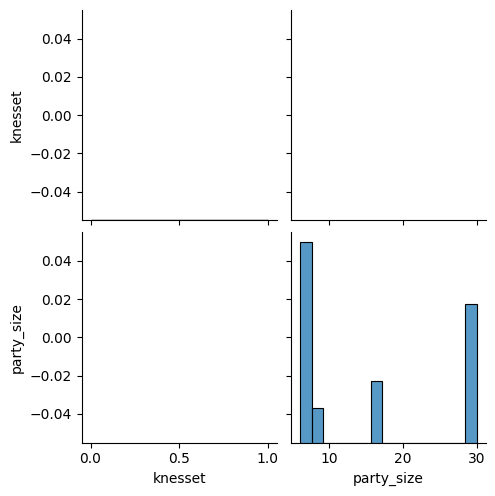

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pair plot
sns.pairplot(combined_df)



# Show the plot
plt.show()


# This is where i get insights for likud only.

In [5]:
import pandas as pd
combined_df = pd.read_csv('combined_data.csv')

In [6]:
# General tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For transformations and predictions
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances

# For the tree visualization
import pydot
from IPython.display import Image
#from sklearn.externals.six import StringIO

# For scoring
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.metrics import mean_squared_error as mse


# For validation
from sklearn.model_selection import train_test_split as split

%matplotlib inline

In [7]:
knesset_24 = pd.read_csv('combined_data.csv', index_col='session')
knesset_24.head()

,knesset,speaker,party,role,text,subject,sub_subject
session,,,,,,,
NaN,NaN,NaN,NaN,NaN,"דברי הכנסתחוברת כ""וישיבה קכ""ז",מסמכים שהונחו על שולחן הכנסת,NaN
NaN,NaN,מיקי לוי,NaN,"היו""ר","חברי הכנסת, היום ט' באייר התשפ""ב, 10 במאי 2022...",מסמכים שהונחו על שולחן הכנסת,NaN
NaN,NaN,דן מרזוק,NaN,מזכיר הכנסת,"ברשות יושב-ראש הכנסת, אני מתכבד להודיעכם, כי ה...",מסמכים שהונחו על שולחן הכנסת,NaN
NaN,NaN,מיקי לוי,NaN,"היו""ר",תודה רבה.,נאומים בני דקה,NaN
NaN,NaN,מיקי לוי,NaN,"היו""ר","חברי הכנסת שמעוניינים לנאום נאומים בני דקה, בב...",נאומים בני דקה,NaN


In [8]:
knesset_24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14418 entries, nan to nan
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   knesset      0 non-null      float64
 1   speaker      14407 non-null  object 
 2   party        7428 non-null   object 
 3   role         6331 non-null   object 
 4   text         14414 non-null  object 
 5   subject      14418 non-null  object 
 6   sub_subject  9230 non-null   object 
dtypes: float64(1), object(6)
memory usage: 901.1+ KB


In [34]:
knesset_24.describe()

,knesset
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


## we need to turn all categorical to numerical so we can pair plot (or create a numerical features based on the categorical ones)

In [9]:
# Drop 'knesset' and 'session' columns
df_cleaned = combined_df.drop(columns=['knesset', 'session'])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   speaker      14407 non-null  object
 1   party        7428 non-null   object
 2   role         6331 non-null   object
 3   text         14414 non-null  object
 4   subject      14418 non-null  object
 5   sub_subject  9230 non-null   object
dtypes: object(6)
memory usage: 676.0+ KB


In [10]:
df_cleaned.describe()

,speaker,party,role,text,subject,sub_subject
count,14407,7428,6331,14414,14418,9230
unique,147,18,47,12696,184,35
top,יבגני סובה,הליכוד,"היו""ר",– – –,"הצעת חוק קליטת חיילים משוחררים (תיקון מס' 24),...",(הצעת קבוצת חברי הכנסת)
freq,1017,3510,4276,813,1062,2574


In [11]:
# Filter the DataFrame for rows where the party is "הליכוד"
likud_speakers = df_cleaned[df_cleaned['party'] == 'הליכוד']

# Extract the unique speakers
unique_likud_speakers = likud_speakers['speaker'].unique()

# Print the unique speakers
print(f"Speakers from 'הליכוד': {unique_likud_speakers}")


Speakers from 'הליכוד': ['יולי יואל אדלשטיין' 'אורלי לוי אבקסיס' 'יריב לוין' 'אופיר אקוניס'
 'בנימין נתניהו' 'אופיר כץ' 'דוד אמסלם' 'גלית דיסטל אטבריאן' 'שלמה קרעי'
 'פטין מולא' 'אמיר אוחנה' 'מאי גולן' 'מירי מרים רגב' 'יואב קיש' 'אלי כהן'
 'יואב גלנט' 'דסטה גדי יברקן' 'ישראל כץ' 'יובל שטייניץ' 'קטי קטרין שטרית'
 'ניר ברקת' 'אבי דיכטר' 'קרן ברק' 'דוד ביטן' 'חיים כץ' 'גילה גמליאל'
 'חוה אתי עטייה' 'מכלוף מיקי זוהר' 'צחי הנגבי']


## Wonderfull, all 29 likud spokesmen are in this list

now we shall impute (in other words complete) the party for likud members if it's missing or written inccorectly.

In [12]:
# Step 1: Find the speakers that belong to 'הליכוד'
likud_speakers = df_cleaned[df_cleaned['party'] == 'הליכוד']['speaker'].unique()

# Step 2: Update the 'party' column for rows where the 'speaker' is in the list of 'הליכוד' speakers
# and where the 'party' column is missing or incorrect
df_cleaned.loc[df_cleaned['speaker'].isin(likud_speakers) & df_cleaned['party'].isna(), 'party'] = 'הליכוד'

# Step 3: Check if there are any mistakes (incorrect party values for 'הליכוד' speakers)
df_cleaned.loc[df_cleaned['speaker'].isin(likud_speakers) & (df_cleaned['party'] != 'הליכוד'), 'party'] = 'הליכוד'

# Verify the change
print(df_cleaned.head())


    speaker party         role  \
0       NaN   NaN          NaN   
1  מיקי לוי   NaN        היו"ר   
2  דן מרזוק   NaN  מזכיר הכנסת   
3  מיקי לוי   NaN        היו"ר   
4  מיקי לוי   NaN        היו"ר   

                                                text  \
0                      דברי הכנסתחוברת כ"וישיבה קכ"ז   
1  חברי הכנסת, היום ט' באייר התשפ"ב, 10 במאי 2022...   
2  ברשות יושב-ראש הכנסת, אני מתכבד להודיעכם, כי ה...   
3                                          תודה רבה.   
4  חברי הכנסת שמעוניינים לנאום נאומים בני דקה, בב...   

                        subject sub_subject  
0  מסמכים שהונחו על שולחן הכנסת         NaN  
1  מסמכים שהונחו על שולחן הכנסת         NaN  
2  מסמכים שהונחו על שולחן הכנסת         NaN  
3                נאומים בני דקה         NaN  
4                נאומים בני דקה         NaN  


In [13]:
df_cleaned.head()

,speaker,party,role,text,subject,sub_subject
0,NaN,NaN,NaN,"דברי הכנסתחוברת כ""וישיבה קכ""ז",מסמכים שהונחו על שולחן הכנסת,NaN
1,מיקי לוי,NaN,"היו""ר","חברי הכנסת, היום ט' באייר התשפ""ב, 10 במאי 2022...",מסמכים שהונחו על שולחן הכנסת,NaN
2,דן מרזוק,NaN,מזכיר הכנסת,"ברשות יושב-ראש הכנסת, אני מתכבד להודיעכם, כי ה...",מסמכים שהונחו על שולחן הכנסת,NaN
3,מיקי לוי,NaN,"היו""ר",תודה רבה.,נאומים בני דקה,NaN
4,מיקי לוי,NaN,"היו""ר","חברי הכנסת שמעוניינים לנאום נאומים בני דקה, בב...",נאומים בני דקה,NaN


In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   speaker      14407 non-null  object
 1   party        7701 non-null   object
 2   role         6331 non-null   object
 3   text         14414 non-null  object
 4   subject      14418 non-null  object
 5   sub_subject  9230 non-null   object
dtypes: object(6)
memory usage: 676.0+ KB


In [15]:
# Drop rows where 'party' is not 'הליכוד'
df_cleaned_likud = df_cleaned[df_cleaned['party'] == 'הליכוד']

# Verify the change
print(df_cleaned_likud.head())
print(df_cleaned_likud.info())


               speaker   party role  \
20  יולי יואל אדלשטיין  הליכוד  NaN   
51    אורלי לוי אבקסיס  הליכוד  NaN   
55    אורלי לוי אבקסיס  הליכוד  NaN   
59    אורלי לוי אבקסיס  הליכוד  NaN   
69    אורלי לוי אבקסיס  הליכוד  NaN   

                                                 text  \
20  תודה, אדוני היושב-ראש. חבריי חברי הכנסת, חבריי...   
51  כן. אדוני היושב-ראש, כפי שהבטחנו, וכדי שהחוק ה...   
55                                  אפשר לברך, אדוני?   
59  תודה רבה לך, אדוני היושב-ראש. תודה לחברי הכנסת...   
69               לא 2015, אני חושבת 2018, 2019 אפילו.   

                                         subject                  sub_subject  
20             ציון יום הניצחון על גרמניה הנאצית                          NaN  
51  הצעת חוק דמי מחלה (תיקון מס' 6), התשפ"ב–2022  (קריאה שנייה וקריאה שלישית)  
55  הצעת חוק דמי מחלה (תיקון מס' 6), התשפ"ב–2022  (קריאה שנייה וקריאה שלישית)  
59  הצעת חוק דמי מחלה (תיקון מס' 6), התשפ"ב–2022  (קריאה שנייה וקריאה שלישית)  
69  הצעת חוק דמי מחלה 

In [16]:
df_cleaned_likud.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3783 entries, 20 to 14417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   speaker      3783 non-null   object
 1   party        3783 non-null   object
 2   role         273 non-null    object
 3   text         3782 non-null   object
 4   subject      3783 non-null   object
 5   sub_subject  2689 non-null   object
dtypes: object(6)
memory usage: 206.9+ KB


In [17]:
df_cleaned_likud.reset_index(drop=True, inplace=True)

In [18]:
df_cleaned_likud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   speaker      3783 non-null   object
 1   party        3783 non-null   object
 2   role         273 non-null    object
 3   text         3782 non-null   object
 4   subject      3783 non-null   object
 5   sub_subject  2689 non-null   object
dtypes: object(6)
memory usage: 177.5+ KB


In [19]:
# Display all unique roles in the 'role' column
unique_roles = df_cleaned['role'].unique()
print("Unique roles in the 'role' column:")
print(unique_roles)


Unique roles in the 'role' column:
[nan 'היו"ר' 'מזכיר הכנסת' 'שר החקלאות ופיתוח הכפר'
 'יו"ר ועדת העבודה והרווחה' 'שרת הכלכלה והתעשייה'
 'השר לפיתוח הפריפריה, הנגב והגליל' 'שר המשפטים' 'שר התקשורת' 'ראש הממשלה'
 'שר הביטחון' 'שרת החינוך' 'השר המקשר בין הממשלה לבין הכנסת'
 'יו"ר ועדת הכנסת' 'סגן שרת הכלכלה והתעשייה' 'שר התיירות' 'שר הבריאות'
 'סגן השר לביטחון הפנים' 'סגנית מזכיר הכנסת' 'סגן שר החוץ'
 'שרת התחבורה והבטיחות בדרכים' 'יו"ר' 'השר במשרד האוצר' 'סגן שר הביטחון'
 'שרת האנרגיה' 'ראש' 'יו"ר ועדת הכספים' 'שר הרווחה והביטחון החברתי'
 'שר המודיעין' 'סגן השר לשירותי דת' 'שרת הפנים' 'עאידה' 'שר החוץ'
 'השרה להגנת הסביבה' 'יו"ר הכנסת' 'נשיאת הפרלמנט האירופי'
 'יו"ר ועדת החוץ והביטחון' 'שר לביטחון הפנים' 'שר הבינוי והשיכון'
 'סגן שרת החינוך' 'שר התרבות והספורט' 'סגן שר במשרד ראש הממשלה'
 'השרה לשוויון חברתי וגמלאים' 'השר לירושלים ומורשת' 'יו"ר הוועדה המשותפת'
 'שר התפוצות' 'שרת העלייה והקליטה' 'יו"ר ועדת הבריאות']


In [20]:
# Create a dictionary with 'speaker' as key and 'role' as value
speaker_role_dict = df_cleaned_likud.dropna(subset=['role']).set_index('speaker')['role'].to_dict()

# Display the dictionary
print("Speaker to Role dictionary:")
print(speaker_role_dict)


Speaker to Role dictionary:
{'דוד ביטן': 'היו"ר'}


In [21]:
# Count unique values in the 'role' column
unique_roles_count = df_cleaned_likud['role'].nunique()

# Display the result
print(f"Number of unique roles: {unique_roles_count}")

# Optionally, if you want to see the actual unique roles:
unique_roles = df_cleaned_likud['role'].unique()
print(f"Unique roles: {unique_roles}")


Number of unique roles: 1
Unique roles: [nan 'היו"ר']


In [22]:
# Cleaned dictionary with correct syntax and no empty strings
dict_knesset_24 = {
    'יולי יואל אדלשטיין': 'יו"ר ועדת חוץ וביטחון וחבר כנסת מטעם הליכוד',
    'אורלי לוי אבקסיס': 'חברת כנסת מטעם הליכוד',  # Provide a placeholder role if missing
    'יריב לוין': 'סגן ראש הממשלה שר המשפטים',
    'אופיר אקוניס': 'שר החדשנות המדע והטכנולוגיה',
    'בנימין נתניהו': 'ראש הממשלה',
    'אופיר כץ': 'חבר כנסת מטעם הליכוד',
    'דוד אמסלם': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
    'גלית דיסטל אטבריאן': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'שלמה קרעי': 'שר התקשורת',
    'פטין מולא': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
    'אמיר אוחנה': 'יושב–ראש הכנסת',
    'מאי גולן': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'מירי מרים רגב': 'שרת התחבורה והבטיחות בדרכים',
    'יואב קיש': 'שר החינוך, שיתוף פעולה אזורי והשר המקשר בין הממשלה לכנסת',
    'אלי כהן': 'שר האנרגיה והתשתיות',
    'יואב גלנט': 'שר הביטחון',  # Added a placeholder role
    'דסטה גדי יברקן': 'חבר כנסת מטעם הליכוד',  # Added a placeholder role
    'ישראל כץ': 'שר החוץ',
    'יובל שטייניץ': 'שר האוצר',  # Added a placeholder role
    'קטי קטרין שטרית': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'ניר ברקת': 'שר הכלכלה והתעשייה',
    'אבי דיכטר': 'שר החקלאות ופיתוח הכפר',
    'קרן ברק': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'דוד ביטן': 'יו"ר ועדת הכלכלה',
    'חיים כץ': 'שר התיירות',
    'גילה גמליאל': 'שרת המודיעין',
    'חוה אתי עטייה': 'חברת כנסת מטעם הליכוד',  # Added a placeholder role
    'מכלוף מיקי זוהר': 'שר התרבות והספורט',
    'צחי הנגבי': 'שר לעניינים אסטרטגיים'
}

# Use the dictionary to fill the 'role' column for speakers with missing roles
df_cleaned_likud.loc[:, 'role'] = df_cleaned_likud.apply(
    lambda row: dict_knesset_24.get(row['speaker'], row['role']), axis=1
)

# Verify the change
print(df_cleaned_likud.head())
print(f"Number of missing roles: {df_cleaned_likud['role'].isna().sum()}")


              speaker   party                                         role  \
0  יולי יואל אדלשטיין  הליכוד  יו"ר ועדת חוץ וביטחון וחבר כנסת מטעם הליכוד   
1    אורלי לוי אבקסיס  הליכוד                        חברת כנסת מטעם הליכוד   
2    אורלי לוי אבקסיס  הליכוד                        חברת כנסת מטעם הליכוד   
3    אורלי לוי אבקסיס  הליכוד                        חברת כנסת מטעם הליכוד   
4    אורלי לוי אבקסיס  הליכוד                        חברת כנסת מטעם הליכוד   

                                                text  \
0  תודה, אדוני היושב-ראש. חבריי חברי הכנסת, חבריי...   
1  כן. אדוני היושב-ראש, כפי שהבטחנו, וכדי שהחוק ה...   
2                                  אפשר לברך, אדוני?   
3  תודה רבה לך, אדוני היושב-ראש. תודה לחברי הכנסת...   
4               לא 2015, אני חושבת 2018, 2019 אפילו.   

                                        subject                  sub_subject  
0             ציון יום הניצחון על גרמניה הנאצית                          NaN  
1  הצעת חוק דמי מחלה (תיקון מס' 6), 

In [23]:
# Display the speaker and role columns
speaker_role_result = df_cleaned_likud[['speaker', 'role']]

# Show the first few rows to verify
print(speaker_role_result.head())

# Optionally, display all unique speaker-role pairs
print(speaker_role_result.drop_duplicates())


              speaker                                         role
0  יולי יואל אדלשטיין  יו"ר ועדת חוץ וביטחון וחבר כנסת מטעם הליכוד
1    אורלי לוי אבקסיס                        חברת כנסת מטעם הליכוד
2    אורלי לוי אבקסיס                        חברת כנסת מטעם הליכוד
3    אורלי לוי אבקסיס                        חברת כנסת מטעם הליכוד
4    אורלי לוי אבקסיס                        חברת כנסת מטעם הליכוד
                 speaker                                               role
0     יולי יואל אדלשטיין        יו"ר ועדת חוץ וביטחון וחבר כנסת מטעם הליכוד
1       אורלי לוי אבקסיס                              חברת כנסת מטעם הליכוד
7               דוד ביטן                                   יו"ר ועדת הכלכלה
90             יריב לוין                          סגן ראש הממשלה שר המשפטים
94          אופיר אקוניס                        שר החדשנות המדע והטכנולוגיה
95         בנימין נתניהו                                         ראש הממשלה
98              אופיר כץ                               חבר כנסת מט

In [24]:
df_cleaned_likud.head()

,speaker,party,role,text,subject,sub_subject
0,יולי יואל אדלשטיין,הליכוד,"יו""ר ועדת חוץ וביטחון וחבר כנסת מטעם הליכוד","תודה, אדוני היושב-ראש. חבריי חברי הכנסת, חבריי...",ציון יום הניצחון על גרמניה הנאצית,NaN
1,אורלי לוי אבקסיס,הליכוד,חברת כנסת מטעם הליכוד,"כן. אדוני היושב-ראש, כפי שהבטחנו, וכדי שהחוק ה...","הצעת חוק דמי מחלה (תיקון מס' 6), התשפ""ב–2022",(קריאה שנייה וקריאה שלישית)
2,אורלי לוי אבקסיס,הליכוד,חברת כנסת מטעם הליכוד,"אפשר לברך, אדוני?","הצעת חוק דמי מחלה (תיקון מס' 6), התשפ""ב–2022",(קריאה שנייה וקריאה שלישית)
3,אורלי לוי אבקסיס,הליכוד,חברת כנסת מטעם הליכוד,"תודה רבה לך, אדוני היושב-ראש. תודה לחברי הכנסת...","הצעת חוק דמי מחלה (תיקון מס' 6), התשפ""ב–2022",(קריאה שנייה וקריאה שלישית)
4,אורלי לוי אבקסיס,הליכוד,חברת כנסת מטעם הליכוד,"לא 2015, אני חושבת 2018, 2019 אפילו.","הצעת חוק דמי מחלה (תיקון מס' 6), התשפ""ב–2022",(קריאה שנייה וקריאה שלישית)


In [25]:
# Display only the 'speaker' column to see the unique speakers
unique_speakers = df_cleaned_likud['speaker'].unique()

# Show the unique speakers
print(unique_speakers)


['יולי יואל אדלשטיין' 'אורלי לוי אבקסיס' 'דוד ביטן' 'יריב לוין'
 'אופיר אקוניס' 'בנימין נתניהו' 'אופיר כץ' 'דוד אמסלם'
 'גלית דיסטל אטבריאן' 'שלמה קרעי' 'פטין מולא' 'אמיר אוחנה' 'מאי גולן'
 'מירי מרים רגב' 'יואב קיש' 'אלי כהן' 'יואב גלנט' 'דסטה גדי יברקן'
 'ישראל כץ' 'יובל שטייניץ' 'קטי קטרין שטרית' 'ניר ברקת' 'אבי דיכטר'
 'קרן ברק' 'חיים כץ' 'גילה גמליאל' 'חוה אתי עטייה' 'מכלוף מיקי זוהר'
 'צחי הנגבי']


In [26]:
# Filter the DataFrame for the speaker 'דוד ביטן' and display the role
david_biton_role = df_cleaned_likud[df_cleaned_likud['speaker'] == 'דוד ביטן']['role'].iloc[0]

# Display the role
print(f"The role of 'דוד ביטן' is: {david_biton_role}")


The role of 'דוד ביטן' is: יו"ר ועדת הכלכלה


In [27]:
df_cleaned_likud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3783 entries, 0 to 3782
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   speaker      3783 non-null   object
 1   party        3783 non-null   object
 2   role         3783 non-null   object
 3   text         3782 non-null   object
 4   subject      3783 non-null   object
 5   sub_subject  2689 non-null   object
dtypes: object(6)
memory usage: 177.5+ KB


In [28]:
# Filter the DataFrame to show rows where the 'text' column is missing (NaN)
missing_text_rows = df_cleaned_likud[df_cleaned_likud['text'].isna()]

missing_text_rows


,speaker,party,role,text,subject,sub_subject
591,גלית דיסטל אטבריאן,הליכוד,חברת כנסת מטעם הליכוד,NaN,העלייה במקרי הטרור החקלאי ברחבי ישראל ובמיוחד ...,NaN


In [29]:
# Display rows between index 580 and 600 (inclusive)
df_cleaned_likud.iloc[580:601]


,speaker,party,role,text,subject,sub_subject
580,דוד אמסלם,הליכוד,חבר כנסת מטעם הליכוד,ספרו לנו. הרי אתה משקר.,העלייה במקרי הטרור החקלאי ברחבי ישראל ובמיוחד ...,NaN
581,גלית דיסטל אטבריאן,הליכוד,חברת כנסת מטעם הליכוד,דוד המלך. דוד המלך.,העלייה במקרי הטרור החקלאי ברחבי ישראל ובמיוחד ...,NaN
582,אמיר אוחנה,הליכוד,יושב–ראש הכנסת,איזו צמיחה? היום פורסמה צמיחה שלילית. כמה שנים...,העלייה במקרי הטרור החקלאי ברחבי ישראל ובמיוחד ...,NaN
583,מאי גולן,הליכוד,חברת כנסת מטעם הליכוד,"העם שלך. העם שלי, איפה העם שלי? איפה העם שלי?",העלייה במקרי הטרור החקלאי ברחבי ישראל ובמיוחד ...,NaN
584,מאי גולן,הליכוד,חברת כנסת מטעם הליכוד,"בנט, איפה העם שלי? בנט, איפה העם שלי?",העלייה במקרי הטרור החקלאי ברחבי ישראל ובמיוחד ...,NaN
585,שלמה קרעי,הליכוד,שר התקשורת,אתה קובע – – – אתה הקמת ממשלה לא לגיטימית.,העלייה במקרי הטרור החקלאי ברחבי ישראל ובמיוחד ...,NaN
586,מאי גולן,הליכוד,חברת כנסת מטעם הליכוד,את הלשכה שלך אתה לא מנהל – אתה יכול לנהל מדינה...,העלייה במקרי הטרור החקלאי ברחבי ישראל ובמיוחד ...,NaN
587,דוד אמסלם,הליכוד,חבר כנסת מטעם הליכוד,תלקק קצת. תלקק – – – מנסור.,העלייה במקרי הטרור החקלאי ברחבי ישראל ובמיוחד ...,NaN
588,גלית דיסטל אטבריאן,הליכוד,חברת כנסת מטעם הליכוד,אבל אתה אמרת לפני הבחירות שאסור לשבת איתו.,העלייה במקרי הטרור החקלאי ברחבי ישראל ובמיוחד ...,NaN
589,דוד אמסלם,הליכוד,חבר כנסת מטעם הליכוד,"עם התנועה האסלאמית – קצת, קצת תלקק.",העלייה במקרי הטרור החקלאי ברחבי ישראל ובמיוחד ...,NaN


In [30]:
# Impute missing text for rows 590 and 591
df_cleaned_likud.loc[590:591, 'text'] = df_cleaned_likud.loc[590:591, 'text'].fillna('No text provided')

# Verify the change
df_cleaned_likud.loc[590:591]


<ipython-input-30-29919efad948>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_likud.loc[590:591, 'text'] = df_cleaned_likud.loc[590:591, 'text'].fillna('No text provided')


,speaker,party,role,text,subject,sub_subject
590,גלית דיסטל אטבריאן,הליכוד,חברת כנסת מטעם הליכוד,– – –,העלייה במקרי הטרור החקלאי ברחבי ישראל ובמיוחד ...,NaN
591,גלית דיסטל אטבריאן,הליכוד,חברת כנסת מטעם הליכוד,No text provided,העלייה במקרי הטרור החקלאי ברחבי ישראל ובמיוחד ...,NaN


In [31]:
df_cleaned_likud.describe()

,speaker,party,role,text,subject,sub_subject
count,3783,3783,3783,3783,3783,2689
unique,29,1,21,3569,125,30
top,דוד אמסלם,הליכוד,חבר כנסת מטעם הליכוד,– – –,"הצעת חוק קליטת חיילים משוחררים (תיקון מס' 24),...",(קריאה שנייה וקריאה שלישית)
freq,483,3783,893,145,439,748


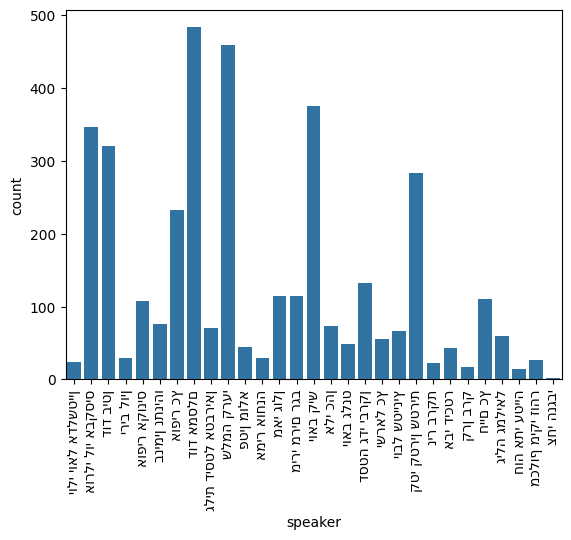

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for the 'role' column
sns.countplot(data=df_cleaned_likud, x='speaker')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


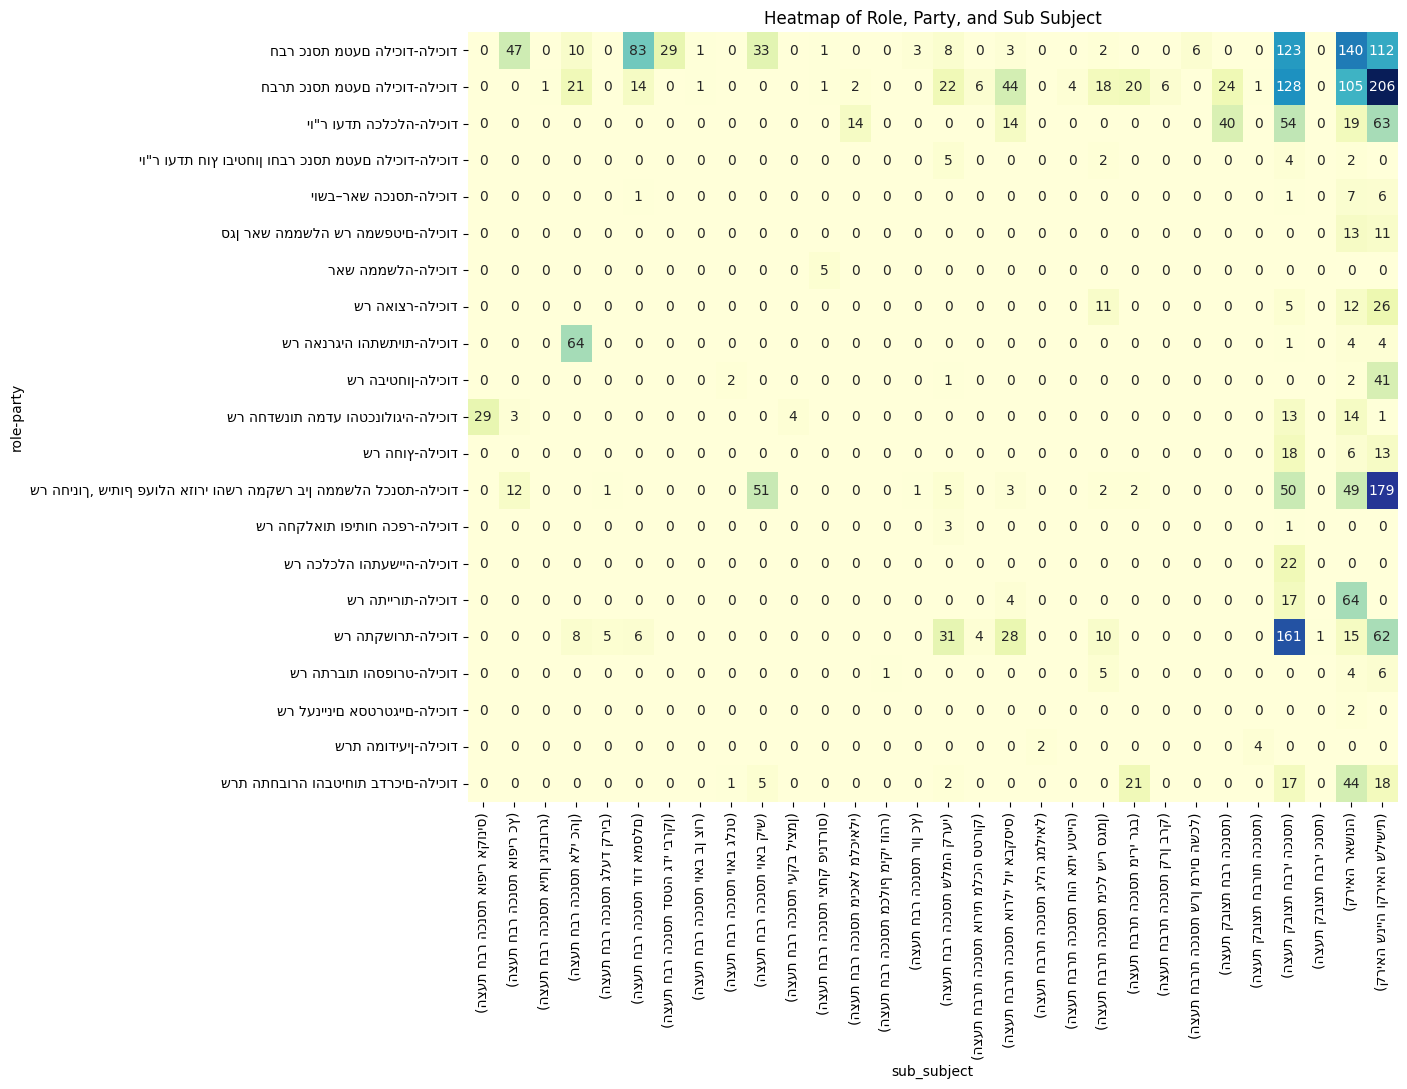

In [33]:
# Create a contingency table for role, party, and sub_subject
contingency_table = pd.crosstab([df_cleaned_likud['role'], df_cleaned_likud['party']], df_cleaned_likud['sub_subject'])

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt="d", cbar=False)
plt.title("Heatmap of Role, Party, and Sub Subject")
plt.show()
